# 13wk-54: 체중감량(교호작용) / 자료분석(Autogluon)

최규빈  
2023-12-01

# 1. 강의영상

[????](????)

# 2. Imports

In [1]:
#!pip install autogluon.eda

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
#---#
from autogluon.tabular import TabularPredictor
import autogluon.eda.auto as auto
#---#
import warnings
warnings.filterwarnings('ignore')

# 3. Data

In [3]:
df_train = pd.read_csv('https://raw.githubusercontent.com/guebin/MP2023/main/posts/weightloss.csv')
df_train

# 4. 적합

In [4]:
# step1 -- pass
# step2 
predictr = TabularPredictor(label = 'Weight_Loss')
# step3 
predictr.fit(df_train,num_gpus=1)
# step4 
yhat = predictr.predict(df_train)

No path specified. Models will be saved in: "AutogluonModels/ag-20231130_133447/"
Beginning AutoGluon training ...
AutoGluon will save models to "AutogluonModels/ag-20231130_133447/"
AutoGluon Version:  0.8.1
Python Version:     3.10.13
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #140-Ubuntu SMP Thu Aug 4 02:23:37 UTC 2022
Disk Space Avail:   1584.95 GB / 1887.51 GB (84.0%)
Train Data Rows:    10000
Train Data Columns: 2
Label Column: Weight_Loss
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == float and many unique label-values observed).
    Label info (max, min, mean, stddev): (18.725299456466026, -3.4848875790233675, 5.11908, 6.09267)
    If 'regression' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Using Feature Generators to preprocess the data ...

# 5. 해석 및 시각화

## A. y의 분포, (X,y)의 관계 시각화

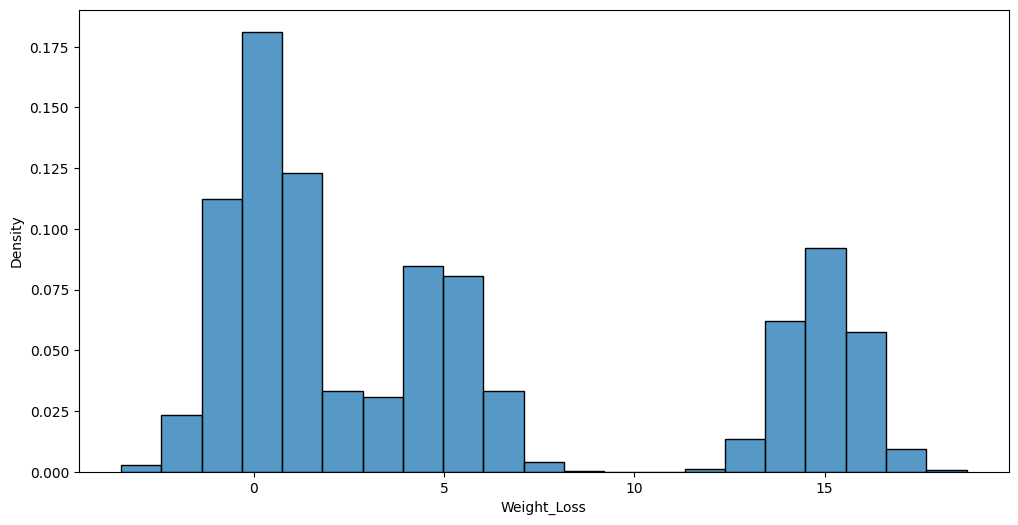

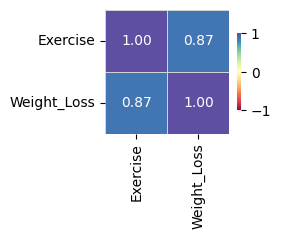

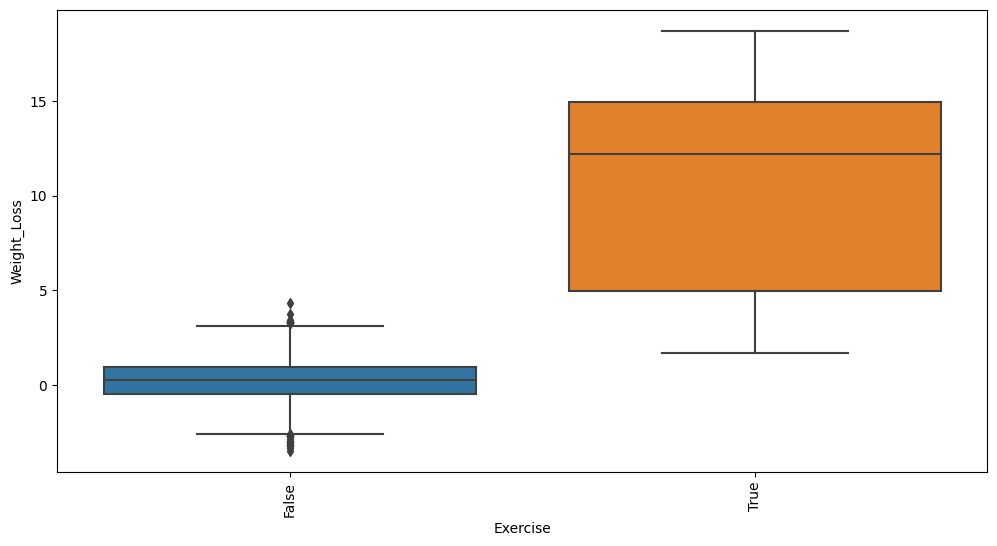

In [5]:
auto.target_analysis(
    train_data=df_train, 
    label='Weight_Loss',
    fit_distributions=False
)

## B. 중요한 설명변수

No path specified. Models will be saved in: "AutogluonModels/ag-20231130_133535/"

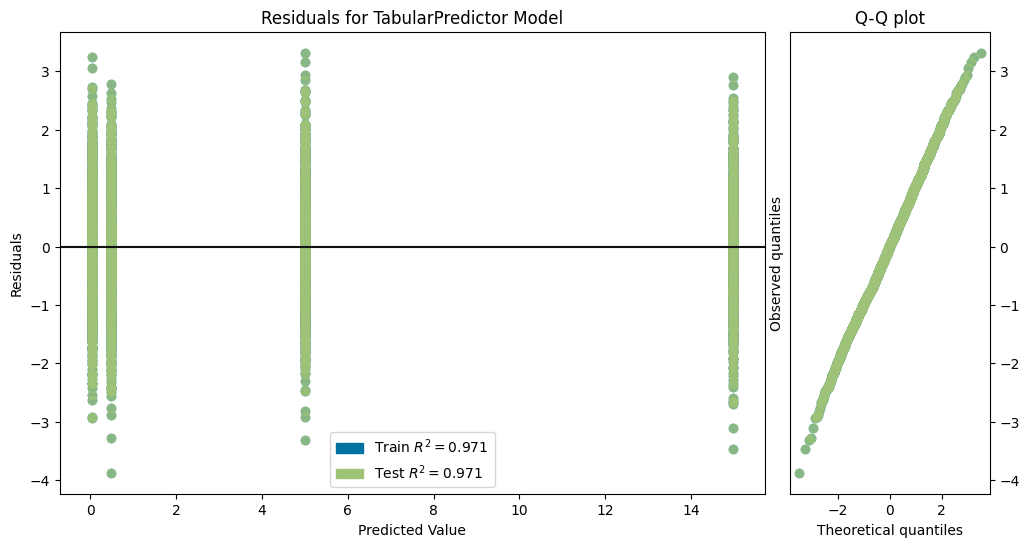

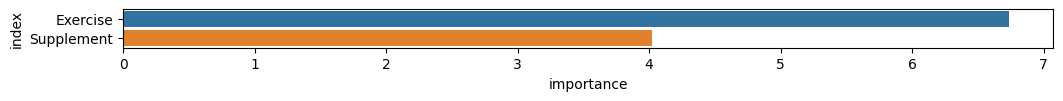

In [7]:
auto.quick_fit(
    train_data = df_train, 
    label='Weight_Loss',
    show_feature_importance_barplots=True
)

## C. 관측치별 해석

In [8]:
predictr.predict(df_train.iloc[[1]])

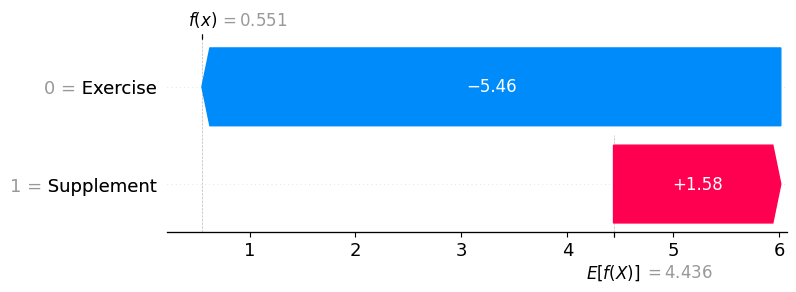

In [9]:
auto.explain_rows(
    train_data=df_train,
    model=predictr,
    display_rows=True,
    plot='waterfall',
    rows=df_train.iloc[[1]]*1
)